# Unsupervised Learning using Bayesian Mixture Models

In [2]:
using Distributions
using FillArrays
using StatsPlots

using LinearAlgebra
using Random

In [4]:
# Set a random seed.
Random.seed!(3)

TaskLocalRNG()

In [5]:
# Define Gaussian mixture model.
w = [0.5, 0.5]
μ = [-3.5, 0.5]
mixturemodel = MixtureModel([MvNormal(Fill(μₖ, 2), I) for μₖ in μ], w)

MixtureModel{MvNormal{Float64, PDMats.ScalMat{Float64}, Fill{Float64, 1, Tuple{Base.OneTo{Int64}}}}}(K = 2)
components[1] (prior = 0.5000): MvNormal{Float64, PDMats.ScalMat{Float64}, Fill{Float64, 1, Tuple{Base.OneTo{Int64}}}}(
dim: 2
μ: 2-element Fill{Float64}: entries equal to -3.5
Σ: [1.0 0.0; 0.0 1.0]
)

components[2] (prior = 0.5000): MvNormal{Float64, PDMats.ScalMat{Float64}, Fill{Float64, 1, Tuple{Base.OneTo{Int64}}}}(
dim: 2
μ: 2-element Fill{Float64}: entries equal to 0.5
Σ: [1.0 0.0; 0.0 1.0]
)



In [6]:
# We draw the data points.
N = 60
x = rand(mixturemodel, N);

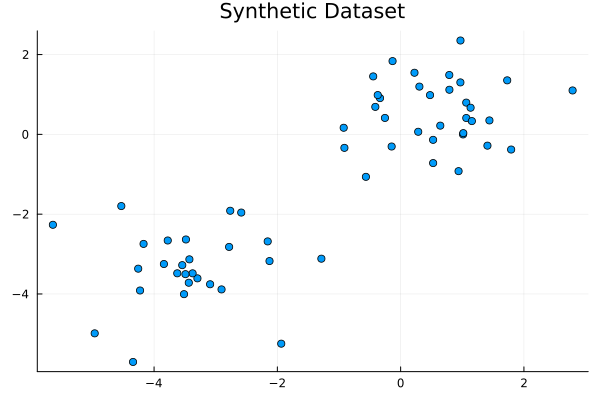

In [7]:
scatter(x[1, :], x[2, :]; legend=false, title="Synthetic Dataset")

In [8]:
using Turing

In [9]:
@model function gaussian_mixture_model(x)
    # Draw the parameters for each of the K=2 clusters from a standard normal distribution.
    K = 2
    μ ~ MvNormal(Zeros(K), I)

    # Draw the weights for the K clusters from a Dirichlet distribution with parameters αₖ = 1.
    w ~ Dirichlet(K, 1.0)
    # Alternatively, one could use a fixed set of weights.
    # w = fill(1/K, K)

    # Construct categorical distribution of assignments.
    distribution_assignments = Categorical(w)

    # Construct multivariate normal distributions of each cluster.
    D, N = size(x)
    distribution_clusters = [MvNormal(Fill(μₖ, D), I) for μₖ in μ]

    # Draw assignments for each datum and generate it from the multivariate normal distribution.
    k = Vector{Int}(undef, N)
    for i in 1:N
        k[i] ~ distribution_assignments
        x[:, i] ~ distribution_clusters[k[i]]
    end

    return k
end

gaussian_mixture_model (generic function with 2 methods)

In [10]:
model = gaussian_mixture_model(x);

In [11]:
sampler = Gibbs(PG(100, :k), HMC(0.05, 10, :μ, :w))
nsamples = 100
nchains = 3
chains = sample(model, sampler, MCMCThreads(), nsamples, nchains);

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC ~/.julia/packages/AbstractMCMC/fWWW0/src/sample.jl:296
Sampling (1 threads): 100%|█████████████████████████████| Time: 0:05:53


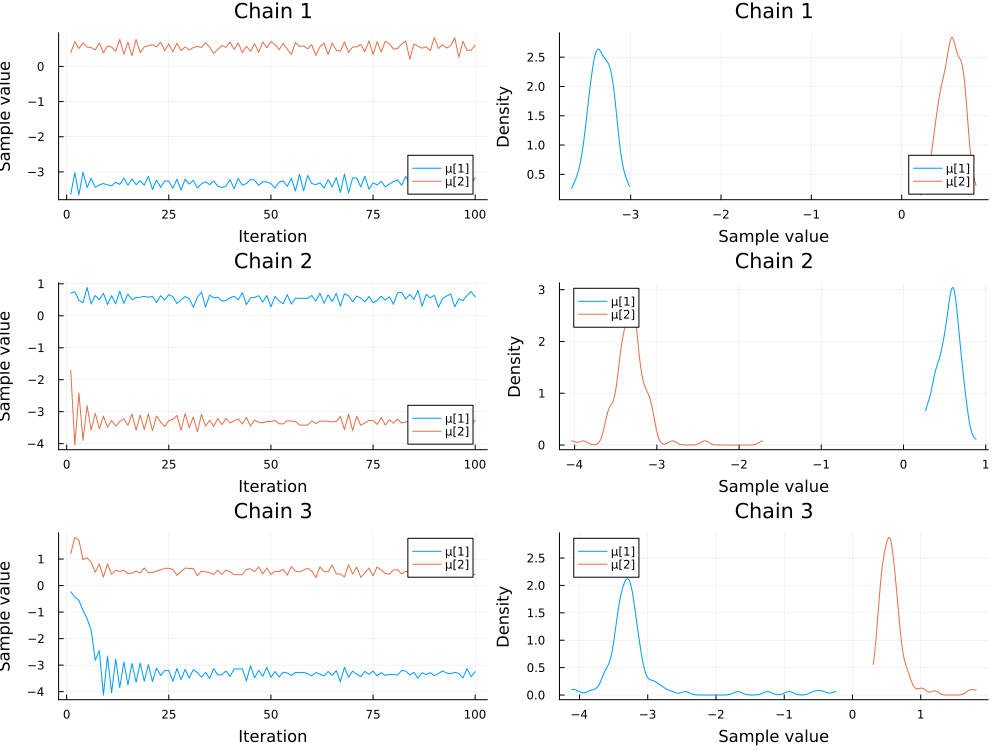

In [12]:
plot(chains[["μ[1]", "μ[2]"]]; colordim=:parameter, legend=true)

# References
- [ ] [Unsupervised Learning using Bayesian Mixture Models](https://turinglang.org/v0.29/tutorials/01-gaussian-mixture-model/)